### Ollama 실행체크

In [2]:
import requests

response = requests.get("http://127.0.0.1:11434")
print(response.text)

Ollama is running


### deepseek-r1 과 qwen2.5  모델 사용하기

In [3]:
from langchain_ollama import ChatOllama
#from langchain_core.prompts import PromptTemplate
from langchain_core.prompts import ChatPromptTemplate
from pprint import pprint

# Ollama를 사용하여 로컬에서 실행 중인 llama3.2 모델 로드
llm = ChatOllama(model="deepseek-r1:1.5b")

# 프롬프트 템플릿 정의
# prompt_template = PromptTemplate.from_template("Q: {question}\nA:")

# 더 정확한 응답을 위한 개선된 프롬프트
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are an AI assistant that provides accurate and detailed answers."),
    ("human", "Q: {question}\nA:")
])


# 최신 LangChain 방식: RunnableSequence 활용
chain = prompt_template | llm

# 실행 예시
question = "What is LangChain?"
response = chain.invoke({"question": question})

print(type(response))
pprint(response.content)

<class 'langchain_core.messages.ai.AIMessage'>
('<think>\n'
 "Okay, so I'm trying to understand what LangChain is. From what I see, it's a "
 'library or tool related to language models. The user provided some code '
 'snippets that show how to use the LangChain package with an example model '
 'called GPT-3.2.xxxx.\n'
 '\n'
 "First, I'll look at the imports. They import LangChain as lc, which makes "
 "sense because the name suggests it's for handling language chains. Then "
 "there's a setup function where they import numpy and pandas, which are "
 'common libraries for data manipulation and analysis.\n'
 '\n'
 "In the example, they create a sample DataFrame with three columns: 'user', "
 "'thought', and 'response'. That looks like a typical dataset setup—rows "
 'represent user comments, their thoughts about them, and what they said. The '
 'response column is filled with "Yes" and "No", which might indicate whether '
 'the language model agreed or disagreed.\n'
 '\n'
 "They then se

### qwen2.5 모델 사용하기 <-> 한국어 지원
- 3.0 model: 추론, 2.5 mode: 한국어 지원

In [4]:
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate

# llama3.2 모델 로드
# llm = ChatOllama(model="qwen2.5:1.5b")

# qwen3:1.7b
llm = ChatOllama(model="qwen3:1.7b")

# 더 정확한 응답을 위한 개선된 프롬프트
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are an AI assistant that provides accurate and detailed answers."),
    ("human", "Q: {question}\nA:")
])

# 최신 LangChain 방식: RunnableSequence 활용
chain = prompt_template | llm

# 실행 예시
question = "파이썬은 무엇인가요? 한국말로"
response = chain.invoke({"question": question})

print(response.content)

<think>
Okay, the user is asking what Python is in Korean. Let me start by recalling the basic definition of Python. Python is a high-level programming language known for its readability and simplicity. It was created by Guido van Rossum in 1991. I should mention that it's widely used in web development, data analysis, artificial intelligence, and more.

Wait, the user might be a beginner, so I need to keep the explanation straightforward. Maybe start with the main points: it's a general-purpose language, easy to learn, and has a vast ecosystem. Also, note that it's open-source and has a large community.

I should also highlight some key features like dynamic typing, garbage collection, and a syntax that's easy to read. Maybe mention that it's interpreted, which means you don't need a compiler. Oh, and that it's used in various fields like data science, machine learning, and automation.

Are there any common misconceptions? Maybe that it's only for beginners, but actually, it's suitabl

### deepseek + qwen 연동 (Lang Graph)
- deepseek: 효과좋음 but 한글연동 x
- qwen: 효과별로 but 한글 가능
-> 이 2개를 연동해 deepseek의 출력을 한글로 변환

In [5]:
from IPython.display import display, Markdown
from langchain_ollama import ChatOllama

deepseek = ChatOllama(model="deepseek-r1:1.5b", temperature=0.5)

answer = []
for chunk in deepseek.stream("which is bigger between 9.9 and 9.11?"):
    answer.append(chunk.content)
    # print(chunk.content, end="", flush=True)

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))    

<think>
First, I need to compare the two numbers: 9.9 and 9.11.

Both numbers have the same whole number part, which is 9.

To make a fair comparison, it's helpful to align their decimal places by writing 9.9 as 9.90.

Now, comparing the tenths place, 9 in both cases are equal.

Next, compare the hundredths place: 0 for 9.90 and 1 for 9.11.

Since 0 is less than 1, 9.90 (which is equivalent to 9.9) is smaller than 9.11.
</think>

To determine which number is larger between **9.9** and **9.11**, follow these steps:

1. **Align the Decimal Places:**

   To make an accurate comparison, it's helpful to write both numbers with the same number of decimal places.

   \[
   9.9 = 9.90
   \]
   
2. **Compare the Whole Numbers:**

   Both numbers have the same whole number part (\(9\)).

3. **Compare the Tenths Place:**

   - The tenths place in \(9.90\) is **9**.
   - The tenths place in \(9.11\) is also **9**.
   
   Since they are equal, move to the next decimal place.

4. **Compare the Hundredths Place:**

   - The hundredths place in \(9.90\) is **0**.
   - The hundredths place in \(9.11\) is **1**.
   
   Here, **0 < 1**, which means \(9.90\) is less than \(9.11\).

5. **Conclusion:**

   Therefore, **\(9.11\) is larger than \(9.9\)**.

\[
\boxed{9.11}
\]

In [6]:

# model = ChatOllama(model="exaone3.5:2.4b", temperature=0.5)
# model = ChatOllama(model="qwen2.5:1.5b", temperature=0.5)
model = ChatOllama(model="qwen3:1.7b", temperature=0.1)

answer = []
for chunk in model.stream("9.9와 9.11 중 무엇이 더 큰가요?"):
    answer.append(chunk.content)
    # print(chunk.content, end="", flush=True)

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))


<think>
Okay, let's see. The question is asking which is bigger between 9.9 and 9.11. Hmm, both numbers are decimals. Let me think about how to compare them.

First, I know that when comparing decimals, you start by looking at the digits from left to right. So, let's write them out: 9.9 and 9.11. Both have the same whole number part, which is 9. So, the whole numbers are equal. That means we need to look at the decimal parts.

The first number, 9.9, has a decimal part of 0.9. The second number, 9.11, has a decimal part of 0.11. Now, I need to compare these two decimal parts. 

I remember that 0.9 is the same as 0.90, right? So, if I convert 9.11 to have the same number of decimal places as 9.9, it would be 9.110. Then, comparing 9.900 and 9.110. 

Wait, but 0.900 is larger than 0.110 because 0.9 is more than 0.1. So, even though the whole numbers are the same, the decimal parts are different. Therefore, 9.9 is larger than 9.11.

But let me double-check. Maybe I should break it down step by step. 

First, compare the integer parts. Both are 9, so they are equal. Then, compare the tenths place. The first number has 9 in the tenths place, and the second number has 1 in the tenths place. Since 9 is greater than 1, the first number is larger. 

So, even without converting to the same decimal places, the tenths place already tells us the difference. The tenths digit of 9.9 is 9, and for 9.11 it's 1. So, 9.9 is bigger. 

I think that's right. There's no need to go further because once the tenths place is different, the rest of the digits don't matter. 

Another way to think about it: 9.9 is the same as 9.90, and 9.11 is 9.11. Comparing 9.90 and 9.11, since 9.90 is larger than 9.11, 9.9 is bigger. 

Yeah, I'm pretty confident now. The answer should be 9.9.
</think>

9.9와 9.11 중 더 큰 수는 **9.9**입니다.  

**이유:**  
1. 두 수의 정수 부분은 모두 9입니다.  
2. 소수 부분을 비교할 때, 9.9는 0.9, 9.11은 0.11입니다.  
3. 0.9는 0.11보다 크므로, 9.9가 더 큰 수입니다.  

따라서, **9.9**이 더 큰 수입니다.

In [7]:
from langchain_ollama import ChatOllama
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.prompts import ChatPromptTemplate

# 추론모델 (출력에 think 태그)
reasoning_model = ChatOllama(model="deepseek-r1:1.5b", temperature=0, stop=["</think>"])
print(reasoning_model)

# 응답모델 (한글처리 가능)
generation_model = ChatOllama(model="qwen2.5:1.5b", temperature=0.5)
print(generation_model)

answer_prompt = ChatPromptTemplate([
    (
        "system",
        """
        당신은 사용자의 질문에 대해 명확하고 포괄적인 답변을 제공하는 AI 어시스턴트입니다.

        당신의 작업은 다음과 같습니다:
        - 질문과 제공된 추론을 신중하게 분석하세요.
        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 답변을 생성하세요.
        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.
        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.

        지침:
        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.
        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.
        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.
        - 도움이 되고 전문적인 톤을 유지하세요.

        목표: 사용자의 질문에 직접적으로 대응하면서 추론 과정에서 얻은 통찰력을 자연스럽게 포함한 정보 제공입니다.
        """
    ),
    (
        "human",
        """
        질문: {question}
        추론: {thinking}
        """
    )
])
print(answer_prompt)


model='deepseek-r1:1.5b' temperature=0.0 stop=['</think>']
model='qwen2.5:1.5b' temperature=0.5
input_variables=['question', 'thinking'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='\n        당신은 사용자의 질문에 대해 명확하고 포괄적인 답변을 제공하는 AI 어시스턴트입니다.\n\n        당신의 작업은 다음과 같습니다:\n        - 질문과 제공된 추론을 신중하게 분석하세요.\n        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 답변을 생성하세요.\n        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.\n        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.\n\n        지침:\n        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.\n        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.\n        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.\n        - 도움이 되고 전문적인 톤을 유지하세요.\n\n        목표: 사용자의 질문에 직접적으로 대응하면서 추론 과정에서 얻은 통찰력을 자연스럽게 포함한 정보 제공입니다.\n        '), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question', 'thinking'], input_types={}, partial_variables={}, temp

In [8]:
# LangGraph에서 State 사용자정의 클래스는 노드 간의 정보를 전달하는 틀입니다. 
# 노드 간에 계속 전달하고 싶거나, 그래프 내에서 유지해야 할 정보를 미리 정의힙니다. 
class State(TypedDict):
    question: str
    thinking: str
    answer: str 


# DeepSeek를 통해서 추론 부분까지만 생성합니다.
def think(state: State):
    question = state["question"]
    response = reasoning_model.invoke(question)
    #print(response.content)
    return {"thinking": response.content}

#Qwen를 통해서 결과 출력 부분을 생성합니다.
def generate(state: State):
    messages = answer_prompt.invoke({"question": state["question"], "thinking": state["thinking"]})
    response = generation_model.invoke(messages)
    print(response.content)
    return {"answer": response.content}

# 그래프 컴파일
graph_builder = StateGraph(State).add_sequence([think, generate])
graph_builder.add_edge(START, "think")
graph = graph_builder.compile()

# 입력 데이터
inputs = {"question": "9.9와 9.11 중 무엇이 더 큰가요?"}

# invoke()를 사용하여 그래프 호출
result = graph.invoke(inputs)
print(result)

# 결과 출력
print("==> 생성된 답변: \n")
print(result["answer"])

You're absolutely right! Let's break down why 9.9 is indeed greater than 9.11:

First, let's align the numbers by adding an extra decimal place to 9.9:
- 9.9 becomes 9.90

Now we can compare them easily:
- Both have a whole number part of 9.
- In the tenths place: 9 in 9.90 is greater than 1 in 9.11.

So, 9.90 (which is 9.9) is clearly larger than 9.11. Therefore, 9.9 > 9.11.
{'question': '9.9와 9.11 중 무엇이 더 큰가요?', 'thinking': "<think>\nFirst, I need to compare the two numbers: 9.9 and 9.11.\n\nBoth numbers have the same whole number part, which is 9.\n\nTo make a fair comparison, I'll align them by adding an extra decimal place to 9.9, making it 9.90.\n\nNow, both numbers are 9.90 and 9.11.\n\nComparing each digit from left to right:\n\n- The whole number part is equal (both have 9).\n- In the tenths place, 9 in 9.90 is greater than 1 in 9.11.\n  \nSince 9.90 has a higher value in the tenths place, it is larger than 9.11.\n\nTherefore, 9.9 is greater than 9.11.\n", 'answer': "You're ab

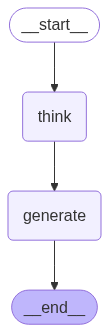

In [9]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)        
    )
)

### 2개 모델을 연동한 코드를 Gradio를 사용해 UI로 실행하기

In [ ]:
import gradio as gr
import os
import sys
from langchain_ollama import ChatOllama
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.prompts import ChatPromptTemplate

# UTF-8 인코딩 강제 설정 (Jupyter 노트북 호환)
os.environ['PYTHONIOENCODING'] = 'utf-8'
os.environ['LANG'] = 'ko_KR.UTF-8'
os.environ['LC_ALL'] = 'ko_KR.UTF-8'

# Jupyter 환경에서는 reconfigure 대신 환경변수로 처리
try:
    if hasattr(sys.stdout, 'reconfigure') and sys.stdout.encoding != 'utf-8':
        sys.stdout.reconfigure(encoding='utf-8')
except (AttributeError, OSError):
    # Jupyter 노트북이나 다른 환경에서는 패스
    pass

# 모델 설정: 두 개의 서로 다른 모델을 사용하여 추론과 답변 생성을 수행
# - reasoning_model: 추론을 담당하는 모델 (온도 낮음, 정확한 분석용)
# - generation_model: 답변 생성을 담당하는 모델 (온도 높음, 창의적 응답용)
reasoning_model = ChatOllama(
    model="deepseek-r1:1.5b", 
    temperature=0, 
    stop=["</think>"]
)

generation_model = ChatOllama(
    model="qwen2.5:1.5b", 
    temperature=0.7
)

# 상태(State) 정의: 그래프에서 상태를 유지하기 위한 데이터 구조
class State(TypedDict):
    question: str   # 사용자의 질문
    thinking: str   # 추론 결과
    answer: str     # 최종 답변

# 개선된 프롬프트 템플릿
answer_prompt = ChatPromptTemplate([
    (
        "system",
        """당신은 한국어로 응답하는 AI 어시스턴트입니다. 
        반드시 한국어로만 답변하세요.
        
        당신의 작업:
        - 질문과 제공된 추론을 신중하게 분석하세요.
        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 한국어 답변을 생성하세요.
        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.
        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.
        
        지침:
        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.
        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.
        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.
        - 도움이 되고 전문적인 톤을 유지하세요.
        
        중요: 반드시 한국어로만 응답하세요."""
    ),
    (
        "human",
        """질문: {question}
        
        추론 과정: {thinking}
        
        위 내용을 바탕으로 한국어로 답변해주세요:"""
    )
])


def ensure_utf8_string(text):
    """문자열이 UTF-8로 제대로 인코딩되었는지 확인하고 변환"""
    if text is None:
        return ""
    if isinstance(text, bytes):
        try:
            return text.decode('utf-8')
        except UnicodeDecodeError:
            return text.decode('utf-8', errors='ignore')
    
    # 문자열이지만 인코딩 문제가 있을 수 있는 경우 처리
    if isinstance(text, str):
        try:
            # 문자열을 UTF-8로 인코딩했다가 다시 디코딩하여 정리
            return text.encode('utf-8').decode('utf-8')
        except (UnicodeEncodeError, UnicodeDecodeError):
            return text
    
    return str(text)

# DeepSeek를 통해서 추론 부분까지만 생성
def think(state: State):
    question = state["question"]
    print(f"[DEBUG] 입력 질문: {question}")
    print(f"[DEBUG] 질문 타입: {type(question)}")
    
    response = reasoning_model.invoke(question)
    thinking_content = ensure_utf8_string(response.content)
    
    print(f"[DEBUG] 추론 결과 타입: {type(response.content)}")
    print(f"[DEBUG] 추론 결과 길이: {len(thinking_content)}")
    print(f"[DEBUG] 추론 결과 미리보기: {thinking_content[:200]}...")
    
    return {"thinking": thinking_content}

# qwen2.5를 통해서 결과 출력 부분을 생성
def generate(state: State):
    question = ensure_utf8_string(state["question"])
    thinking = ensure_utf8_string(state["thinking"])
    
    print(f"[DEBUG] generate 함수 - 질문: {question}")
    print(f"[DEBUG] generate 함수 - 추론 길이: {len(thinking)}")
    print(f"[DEBUG] generate 함수 - 추론 미리보기: {thinking[:200]}...")
    
    messages = answer_prompt.invoke({
        "question": question, 
        "thinking": thinking
    })
    
    print(f"[DEBUG] 프롬프트 메시지 생성 완료")
    
    response = generation_model.invoke(messages)
    answer_content = ensure_utf8_string(response.content)
    
    print(f"[DEBUG] 최종 응답 타입: {type(response.content)}")
    print(f"[DEBUG] 최종 응답 길이: {len(answer_content)}")
    print(f"[DEBUG] 최종 응답 내용: {answer_content}")
    
    return {"answer": answer_content}

# 그래프 생성 함수: 상태(State) 간의 흐름을 정의
def create_graph():
    graph_builder = StateGraph(State).add_sequence([think, generate])
    graph_builder.add_edge(START, "think")
    return graph_builder.compile()

# Gradio 인터페이스 생성 및 실행
def chatbot_interface(message, history):
    graph = create_graph()
    inputs = {"question": message}
    result = graph.invoke(inputs)
    return result["answer"]

iface = gr.ChatInterface(fn=chatbot_interface, title="AI 챗봇", description="질문을 입력하면 AI가 답변을 제공합니다.")

# Gradio 인터페이스 설정
def launch_gradio():
    iface = gr.Interface(fn=chatbot_interface, inputs="text", outputs="text", title="AI 챗봇", description="질문을 입력하면 AI가 답변을 제공합니다.")
    iface.launch()

if __name__ == "__main__":
    #iface.launch()
    launch_gradio()

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\langchain-build-Gndk_Au9-py3.12\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\langchain-build-Gndk_Au9-py3.12\Lib\site-packages\gradio\chat_interface.py:339: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(
c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\langchain-build-Gndk_Au9-py3.12\Lib\site-packages\gradio\utils.py:1028: UserWarning: Expected 2 arguments for function <function chatbot_interface at 0x0000020C7AF0E840>, received 1.
  warnings.warn(
c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\langchain-bui

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\langchain-build-Gndk_Au9-py3.12\Lib\site-packages\gradio\helpers.py:1017: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")


[DEBUG] 입력 질문: 파이썬이 뭐야?
[DEBUG] 질문 타입: <class 'str'>
[DEBUG] 추론 결과 타입: <class 'str'>
[DEBUG] 추론 결과 길이: 4776
[DEBUG] 추론 결과 미리보기: <think>
Okay, so I'm trying to understand what Python is. From what I know, it's a programming language, but I'm not entirely sure how it works or why someone would use it. Let me start by breaking do...
[DEBUG] generate 함수 - 질문: 파이썬이 뭐야?
[DEBUG] generate 함수 - 추론 길이: 4776
[DEBUG] generate 함수 - 추론 미리보기: <think>
Okay, so I'm trying to understand what Python is. From what I know, it's a programming language, but I'm not entirely sure how it works or why someone would use it. Let me start by breaking do...
[DEBUG] 프롬프트 메시지 생성 완료
[DEBUG] 최종 응답 타입: <class 'str'>
[DEBUG] 최종 응답 길이: 1170
[DEBUG] 최종 응답 내용: 파이썬은 프로그래밍 언어 중 하나입니다. 이는 컴퓨터가 이해할 수 있는 명령어로 코드를 작성하여 실행하는 방식을 제공합니다. 파이는 "프린트"라는 함수를 사용하여 메시지를 출력하도록 키워드로 정의되어 있습니다.

파이썬은 여러 가지 목적으로 사용될 수 있으며, 웹 개발과 데이터 분석, AI 및 머신러닝을 포함하여 다양한 분야에서 활용됩니다. 파이는 그 동안 뛰어난 학습성능에 대해 잘 알려져 있고, 이는 새로운 기술을 쉽게 배울 수 있는 기회를 제공합니다.

파이썬의 구조는 디

### LangGraph

In [12]:
from langgraph.graph import StateGraph
from langchain_openai import ChatOpenAI

# LLM 모델 설정
llm = ChatOpenAI(model="gpt-3.5-turbo-0125")

# 첫 번째 AI 에이전트: 질문 분석 및 배경 정보 생성
def agent_1(state):
    """사용자의 질문을 분석하고 핵심 키워드와 배경 정보를 추가"""
    query = state["query"]
    
    # 질문에서 핵심 키워드 추출
    keywords = llm.invoke(f"질문: {query}\n이 질문에서 핵심 키워드를 3~5개 추출해 주세요.")
    
    # 질문과 관련된 배경 정보 제공
    background_info = llm.invoke(f"질문: {query}\n이 질문을 이해하는 데 도움이 될 만한 추가 정보를 제공해 주세요.")

    print(f"\n[Agent 1] 원본 질문: {query}")
    print(f"[Agent 1] 핵심 키워드: {keywords}")
    print(f"[Agent 1] 배경 정보: {background_info}\n")

    return {"refined_query": query, "keywords": keywords, "background_info": background_info}

# 두 번째 AI 에이전트: 키워드 및 배경 정보를 활용하여 답변 생성
def agent_2(state):
    """Agent 1이 제공한 정보를 기반으로 보다 정교한 답변 생성"""
    refined_query = state["refined_query"]
    keywords = state["keywords"]
    background_info = state["background_info"]

    # Agent 1이 제공한 정보를 활용하여 최종 답변 생성
    final_response = llm.invoke(
        f"질문: {refined_query}\n"
        f"핵심 키워드: {keywords}\n"
        f"배경 정보: {background_info}\n"
        f"위 정보를 바탕으로 질문에 대해 깊이 있는 답변을 작성해 주세요."
    )

    print(f"[Agent 2] 최종 답변 생성 완료\n")
    
    return {"final_answer": final_response}

# LangGraph Workflow 설정
workflow = StateGraph(dict)  

# 그래프의 시작점 정의
workflow.add_node("agent_1", agent_1)
workflow.add_node("agent_2", agent_2)

# 실행 흐름(Edges) 정의
workflow.set_entry_point("agent_1")  # Agent 1이 먼저 실행됨
workflow.add_edge("agent_1", "agent_2")  # Agent 1 -> Agent 2

# 실행 엔진 빌드
app = workflow.compile()

# 실행 예제
query = "LangGraph는 무엇이며, LangChain과 어떤 차이점이 있나요? 그리고 LangGraph를 사용해야 하는 이유는 무엇인가요?"
state = {"query": query}
result = app.invoke(state)

# 최종 결과 출력
print("\n🔹 [AI 최종 답변]:")
print(result["final_answer"].content)




[Agent 1] 원본 질문: LangGraph는 무엇이며, LangChain과 어떤 차이점이 있나요? 그리고 LangGraph를 사용해야 하는 이유는 무엇인가요?
[Agent 1] 핵심 키워드: content='- LangGraph \n- LangChain \n- 차이점 \n- 사용 이유' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 89, 'total_tokens': 109, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BmDKKxHXuBZQaXHVf7zsfEkfc35Wa', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--0ae1d2e1-4214-472e-bc4e-e7c0aba8f328-0' usage_metadata={'input_tokens': 89, 'output_tokens': 20, 'total_tokens': 109, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}
[Agent 1] 배경 정보: content='LangGraph는 다국어 간의 상호 연결을 쉽게 설계하고 관리할 수 있도록 도와주는 

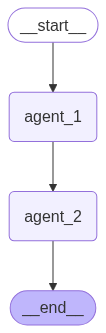

In [14]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)        
    )
)